In [2]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Import and exploring data

In [3]:
## To be executed once:

# zip_dir = './data/emissions.csv.zip'
# extract_path = './data'
# with zipfile.ZipFile(zip_dir, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print(os.listdir(extract_path))

In [4]:
!rm -rf './data/emissions.csv.zip'

In [5]:
emissions = pd.read_csv('./data/emissions.csv', sep=',')
emissions.tail()

,year,state-name,sector-name,fuel-name,value
59896,2021,Wyoming,Commercial carbon dioxide emissions,Coal,0.012374
59897,2021,Wyoming,Residential carbon dioxide emissions,All Fuels,0.937989
59898,2021,Wyoming,Residential carbon dioxide emissions,Natural Gas,0.717777
59899,2021,Wyoming,Residential carbon dioxide emissions,Petroleum,0.220212
59900,2021,Wyoming,Total carbon dioxide emissions from all sectors,Petroleum,10.198574


In [6]:
print(emissions.size, emissions.shape)

299505 (59901, 5)


In [7]:
emissions.describe(exclude='object')['value']

count    59901.000000
mean        35.647050
std        207.883289
min          0.000022
25%          0.793179
50%          4.197628
75%         19.413459
max       5996.429314
Name: value, dtype: float64

In [8]:
emissions.dtypes

year             int64
state-name      object
sector-name     object
fuel-name       object
value          float64
dtype: object

In [9]:
emissions['state-name'].value_counts()

Illinois                1190
Indiana                 1190
Iowa                    1190
Kentucky                1190
Pennsylvania            1190
Wyoming                 1190
Virginia                1190
United States           1190
North Carolina          1190
Missouri                1190
Wisconsin               1189
Minnesota               1189
Colorado                1188
Montana                 1187
Ohio                    1186
Michigan                1185
Maryland                1184
North Dakota            1183
Georgia                 1180
New York                1179
West Virginia           1176
Alabama                 1176
Utah                    1176
Tennessee               1173
Nebraska                1170
South Dakota            1170
South Carolina          1167
Washington              1162
Texas                   1162
Massachusetts           1162
Oklahoma                1162
Alaska                  1161
Nevada                  1160
New Jersey              1158
Kansas        

In [10]:
emissions['sector-name'].value_counts()

Total carbon dioxide emissions from all sectors    10753
Industrial carbon dioxide emissions                10512
Electric Power carbon dioxide emissions            10298
Commercial carbon dioxide emissions                10180
Residential carbon dioxide emissions                9842
Transportation carbon dioxide emissions             8316
Name: sector-name, dtype: int64

In [11]:
emissions['fuel-name'].value_counts()

All Fuels      16214
Petroleum      16202
Natural Gas    15847
Coal           11638
Name: fuel-name, dtype: int64

In [12]:
emissions.isna().sum()

year           0
state-name     0
sector-name    0
fuel-name      0
value          0
dtype: int64

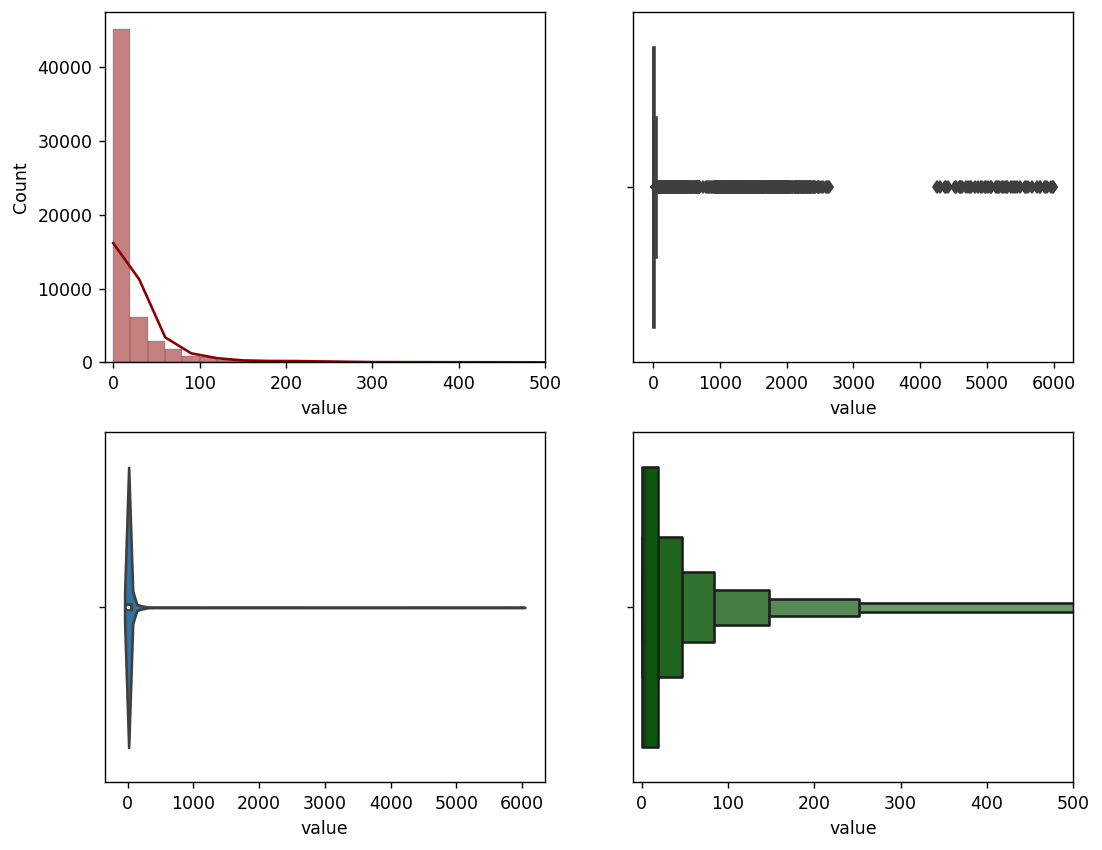

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=125)
sns.histplot(data=emissions, x='value', binwidth=20, ax=axes.flat[0], kde=True, color='darkred')
axes.flat[0].set_xlim(-10, 500)
sns.boxplot(data=emissions, x='value', showfliers=True, ax=axes.flat[1])
sns.violinplot(data=emissions, x='value', showfliers=True, ax=axes.flat[2])
sns.boxenplot(data=emissions, x='value', showfliers=False, ax=axes.flat[3], color='darkgreen')
axes.flat[3].set_xlim(-10, 500)
plt.show()

### 1.1 Subdividing value by `sector`

In [14]:
sector_values = emissions['sector-name'].value_counts().keys()
sector_data = {}
for i in range(len(sector_values)):
    sector = sector_values[i]
    sector_data[sector] = emissions[emissions['sector-name'] == sector_values[i]].loc[:, ['value']].values

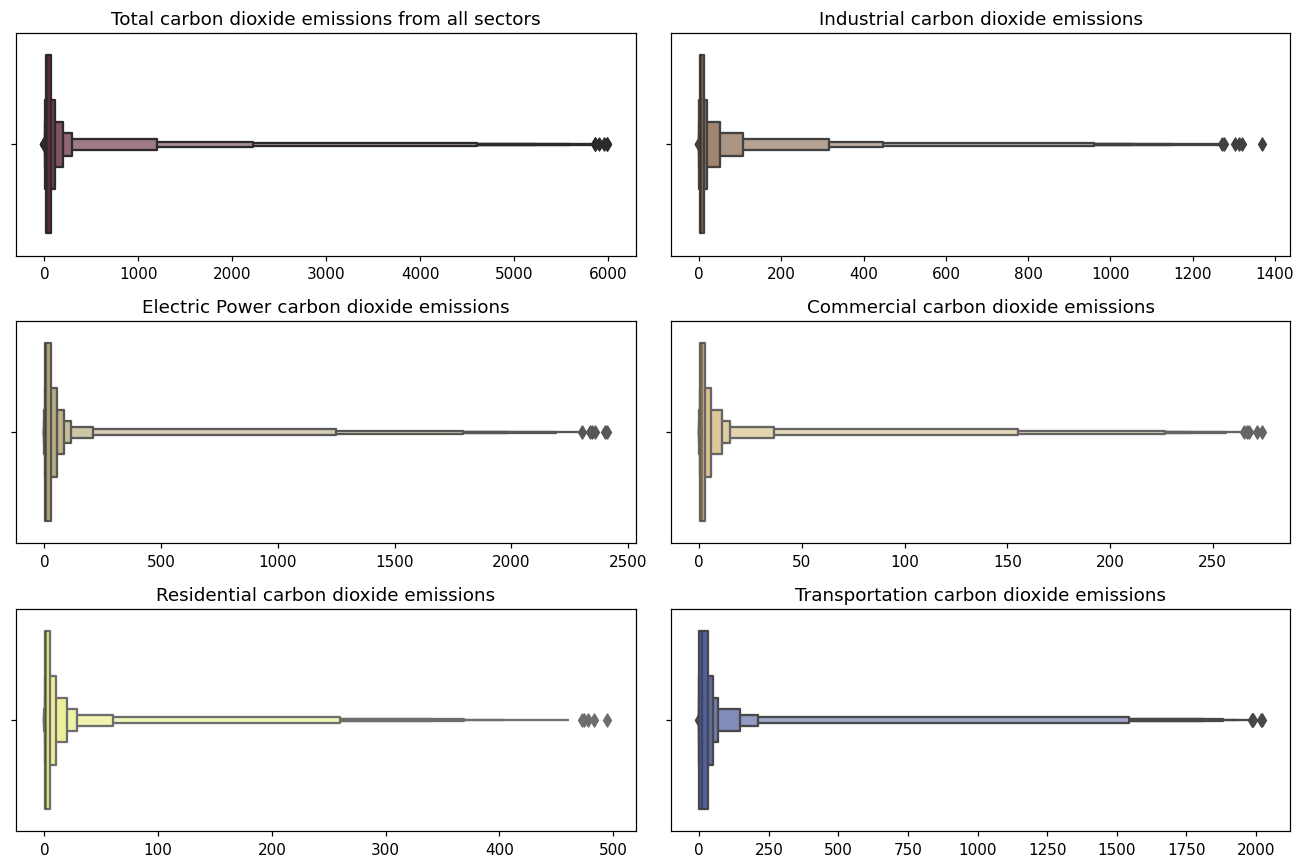

In [71]:
# By sector
all_sectors = sector_data['Total carbon dioxide emissions from all sectors']
industrial_co2 = sector_data['Industrial carbon dioxide emissions']
electric_power = sector_data['Electric Power carbon dioxide emissions']
commercial_co2 = sector_data['Commercial carbon dioxide emissions']
residential_co2 = sector_data['Residential carbon dioxide emissions']
transportation = sector_data['Transportation carbon dioxide emissions']

# Plot settings
par = True
sector_palette = ['#6D213C', '#946846', '#BAAB68', '#E3C16F', '#FAFF70', '#4357AD']

fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 8), dpi=110)
sns.boxenplot(x=all_sectors, showfliers=par, ax=axis.flat[0], color=sector_palette[0])
axis.flat[0].set_title('Total carbon dioxide emissions from all sectors')
sns.boxenplot(x=industrial_co2, showfliers=par, ax=axis.flat[1], color=sector_palette[1])
axis.flat[1].set_title('Industrial carbon dioxide emissions')
sns.boxenplot(x=electric_power, showfliers=par, ax=axis.flat[2], color=sector_palette[2])
axis.flat[2].set_title('Electric Power carbon dioxide emissions')
sns.boxenplot(x=commercial_co2, showfliers=par, ax=axis.flat[3], color=sector_palette[3])
axis.flat[3].set_title('Commercial carbon dioxide emissions')
sns.boxenplot(x=residential_co2, showfliers=par, ax=axis.flat[4], color=sector_palette[4])
axis.flat[4].set_title('Residential carbon dioxide emissions')
sns.boxenplot(x=transportation, showfliers=par, ax=axis.flat[5], color=sector_palette[5])
axis.flat[5].set_title('Transportation carbon dioxide emissions')
plt.tight_layout()
plt.show()

### 1.2 Subdividing value by `fuel`

In [89]:
fuel_names = emissions['fuel-name'].value_counts().keys()[1:]
fuel_data = {}
for i in range(len(fuel_names)):
    fuel = fuel_names[i]
    fuel_data[fuel] = emissions[emissions['fuel-name'] == fuel_names[i]].loc[:, ['value']].values

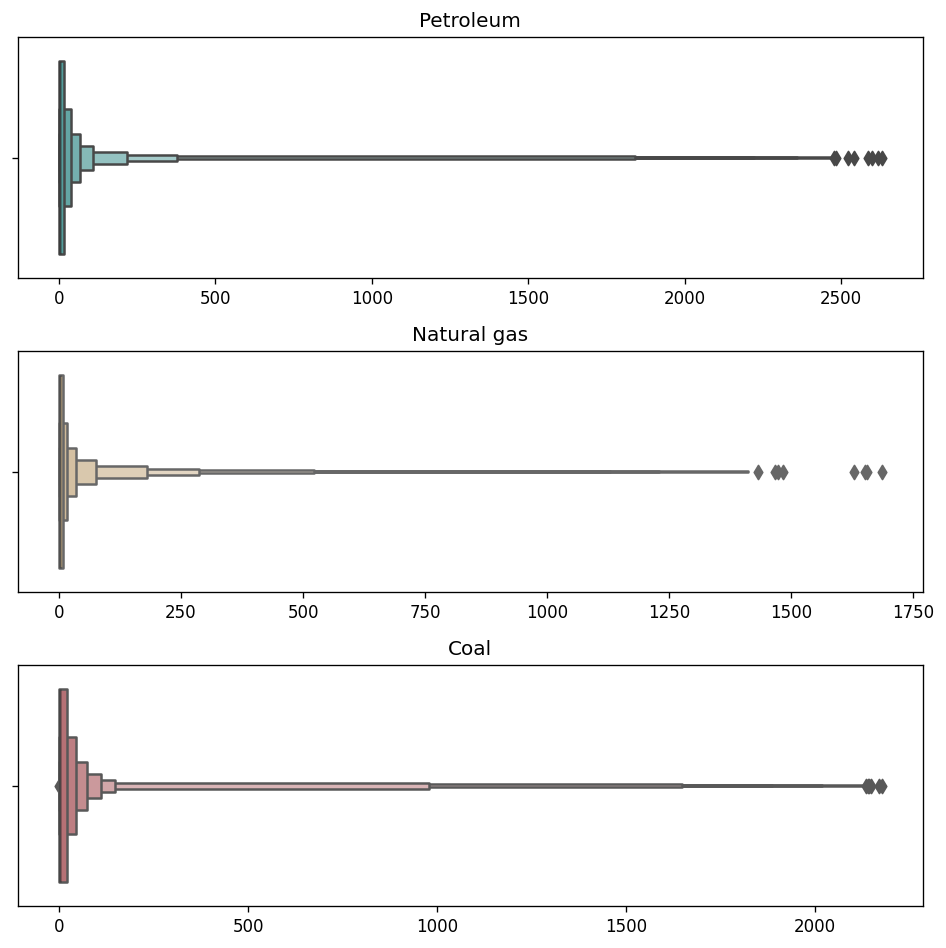

In [108]:
petroleum = fuel_data['Petroleum']
natural_gas = fuel_data['Natural Gas']
coal = fuel_data['Coal']

# Plot settings
fuel_palette = ['#48A9A6', '#D4B483', '#C1666B']
fig, axes = plt.subplots(3, 1, figsize=(8, 8), dpi=120)
sns.boxenplot(x=petroleum, showfliers=par, ax=axes.flat[0], color=fuel_palette[0])
axes.flat[0].set_title('Petroleum')
sns.boxenplot(x=natural_gas, showfliers=par, ax=axes.flat[1], color=fuel_palette[1])
axes.flat[1].set_title('Natural gas')
sns.boxenplot(x=coal, showfliers=par, ax=axes.flat[2], color=fuel_palette[2])
axes.flat[2].set_title('Coal')
plt.tight_layout()
plt.show()